'''
1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unnecessary for analysis.
3.	Answer the following questions. Support your answer with appropriate visualizations.

QNS:

1.	How many matches we've got in the dataset?
2.	How many seasons we've got in the dataset?
3.	Which Team had won by maximum runs?
4.	Which Team had won by maximum wicket?
5.	Which Team had won by closest Margin (minimum runs)?
6.	Which Team had won by minimum wicket?
7.	Which Season had most number of matches?
8.	Which IPL Team is more successful?
9.	Has Toss-winning helped in winning matches?

'''

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
match=pd.read_csv('C:\\Users\\Intel\\DSE-Python & SQL\\Python\\Mini Projects\\ipl-2020-mini project NPV\\matches.csv')
ipl=pd.read_csv('C:\\Users\\Intel\\DSE-Python & SQL\\Python\\Mini Projects\\ipl-2020-mini project NPV\\deliveries.csv')

In [ ]:
match.drop(columns=['city', 'date', 'team1', 'team2','toss_decision', 'result', 
       'dl_applied','player_of_match', 'venue', 'umpire1', 'umpire2','umpire3'],inplace=True)

In [ ]:
# 1.How many matches we've got in the dataset?

In [23]:
print(match['id'].nunique())

636


In [ ]:
# 2.How many seasons we've got in the dataset?

In [36]:
print(match['season'].unique())

print('No of Season are: ',match['season'].nunique())

[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016]
No of Season are:  10


In [27]:
# 3.Which Team had won by maximum runs?

In [7]:
match[match['win_by_runs']== match['win_by_runs'].max()]['winner']

43    Mumbai Indians
Name: winner, dtype: object

In [6]:
# or
max_runs=match.groupby('winner')['win_by_runs'].sum().sort_values()
max_runs

winner
Gujarat Lions                     1
Kochi Tuskers Kerala             23
Rising Pune Supergiants          53
Rising Pune Supergiant          123
Pune Warriors                   139
Deccan Chargers                 421
Sunrisers Hyderabad             476
Delhi Daredevils                571
Rajasthan Royals                821
Kings XI Punjab                 862
Kolkata Knight Riders           897
Royal Challengers Bangalore    1196
Mumbai Indians                 1532
Chennai Super Kings            1587
Name: win_by_runs, dtype: int64

In [ ]:
#4. Which Team had won by maximum wicket?

In [8]:
match[match['win_by_wickets'] == match['win_by_wickets'].max()]['winner']

2            Kolkata Knight Riders
34                 Kings XI Punjab
71                 Deccan Chargers
119               Delhi Daredevils
183    Royal Challengers Bangalore
298               Rajasthan Royals
376                 Mumbai Indians
390            Chennai Super Kings
542    Royal Challengers Bangalore
590            Sunrisers Hyderabad
Name: winner, dtype: object

In [9]:
# 5. Which Team had won by closest Margin (minimum runs)?

In [18]:
match[match['win_by_runs']== match['win_by_runs'].min()]['winner'].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 45
Royal Challengers Bangalore    43
Delhi Daredevils               41
Rajasthan Royals               40
Kings XI Punjab                38
Chennai Super Kings            33
Sunrisers Hyderabad            19
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [7]:
# or
match[(match['win_by_runs']==match['win_by_runs'].min()) & (match['result']=='normal') & (match['win_by_wickets']!=0)]['winner']

1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
5              Sunrisers Hyderabad
6                   Mumbai Indians
                  ...             
628        Rising Pune Supergiants
629                  Gujarat Lions
631    Royal Challengers Bangalore
632    Royal Challengers Bangalore
634            Sunrisers Hyderabad
Name: winner, Length: 339, dtype: object

In [19]:
# 6.Which Team had won by minimum wicket?

In [4]:
match[match['win_by_wickets'] == match['win_by_wickets'].min()]['winner'].value_counts()

Mumbai Indians                 48
Chennai Super Kings            46
Kings XI Punjab                34
Kolkata Knight Riders          31
Royal Challengers Bangalore    31
Rajasthan Royals               25
Sunrisers Hyderabad            24
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

In [22]:
# 7.Which Season had most number of matches?

In [18]:
match['season'].value_counts().iloc[0:1]

2013    76
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

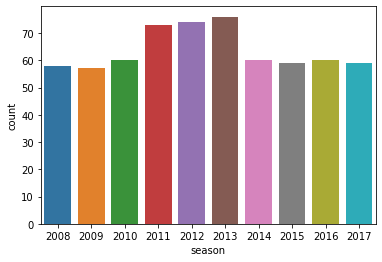

In [67]:
sns.countplot(x='season', data=match)

In [10]:
# 8.Which IPL Team is more successful?

In [19]:
match['winner'].value_counts().iloc[0:1]

Mumbai Indians    92
Name: winner, dtype: int64

<AxesSubplot:xlabel='count', ylabel='winner'>

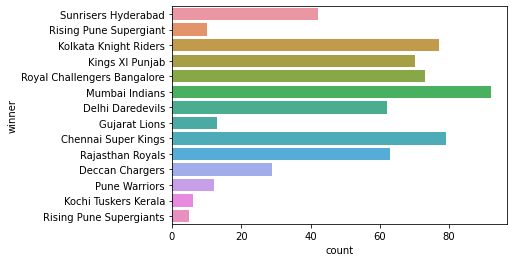

In [66]:
sns.countplot(y='winner', data = match)

In [20]:
# 9.Has Toss-winning helped in winning matches?

In [60]:
a=match[match['toss_winner']==match['winner']]
a=a.nunique()
b=match['id'].nunique()
a.iloc[0:1]
c=a/b
c=c.iloc[0:1]
print('The winning percentage of team that has won the match is: ',c*100)
print('Therefore, the probability of team winning toss is 50/50 and its neither high nor less')

The winning percentage of team that has won the match is:  id    51.100629
dtype: float64
Therefore, the probability of team winning toss is 50/50 and its neither high nor less


C:\Users\Intel\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

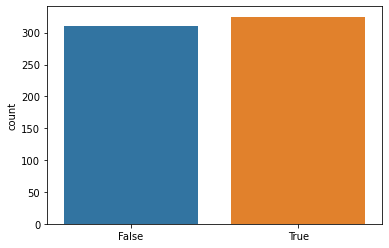

In [68]:
sns.countplot(match['toss_winner'] == match['winner'])